# Differential Expression on GTEx dataset

### Set instance and token

In [1]:
import os, time
import pandas as pd
import matplotlib.pyplot as plt
import integration_curator # Genestack client library

os.environ['PRED_SPOT_HOST'] = 'occam.genestack.com'
os.environ['PRED_SPOT_TOKEN'] = '<token>'
os.environ['PRED_SPOT_VERSION'] = 'default-released'

omics_api = integration_curator.OmicsQueriesApi()

### Get samples

In [2]:
study_filter = 'genestack:accession=GSF962829'
sample_filter = ' OR '.join(['"GTEX original SMTS"="%s"' % x 
                             for x in ['Prostate', 'Breast', 'Salivary Gland']])

start = time.time()
data = omics_api.search_samples(
    study_filter=study_filter, 
    sample_filter=sample_filter
)
samples = pd.DataFrame.from_dict([item['metadata'] for item in data.data])
print('Time to get %s samples: %i seconds\n' % (samples.shape[0], time.time()-start))

samples.head()

Time to get 569 samples: 1 seconds



,genestack:accession,Sample Source ID,Sample Name,Organism,Disease,Tissue,Cell Type,Cell Line,Sampling Site,Age,...,Specimen Collection Time Unit,Harvest Location,Specimen Type,Tissue or Cell Type,Donor Disease,Sample Source,Donor Treatment - Treatment Name,Sample Type,GTEX original SMTS,Specimen Treatment - Treatment Name
0,GSF968643,GTEX-15UF6-0126-SM-6PAMB,GTEX-15UF6-0126-SM-6PAMB,Homo sapiens,Healthy,breast,None,None,Right Breast,None,...,hours,Right Breast,DNA or RNA Extraction from Paxgene-derived Lys...,Mammary Tissue,Healthy,GTEX-15UF6-0126-SM-6PAMB,Unknown,RNA,Breast,Untreated
1,GSF972740,GTEX-RWSA-2026-SM-47JX8,GTEX-RWSA-2026-SM-47JX8,Homo sapiens,Healthy,prostate gland,None,None,Prostate,None,...,hours,Prostate,RNA isolation_PAXgene Tissue miRNA,Prostate,Healthy,GTEX-RWSA-2026-SM-47JX8,Unknown,RNA,Prostate,Untreated
2,GSF974788,GTEX-XOT4-0726-SM-4GIAW,GTEX-XOT4-0726-SM-4GIAW,Homo sapiens,Healthy,breast,None,None,Right Breast,None,...,hours,Right Breast,RNA isolation_PAXgene Tissue miRNA,Mammary Tissue,Healthy,GTEX-XOT4-0726-SM-4GIAW,Unknown,RNA,Breast,Untreated
3,GSF974781,GTEX-XMK1-2626-SM-4B65R,GTEX-XMK1-2626-SM-4B65R,Homo sapiens,Healthy,minor salivary gland,None,None,Inner surface of lower lip,None,...,hours,Inner surface of lower lip,RNA isolation_PAXgene Tissue miRNA,Minor Salivary Gland,Healthy,GTEX-XMK1-2626-SM-4B65R,Unknown,RNA,Salivary Gland,Untreated
4,GSF975793,GTEX-ZDXO-0126-SM-5S2ND,GTEX-ZDXO-0126-SM-5S2ND,Homo sapiens,Healthy,breast,None,None,Right Breast,None,...,hours,Right Breast,RNA Extraction from Paxgene-derived Lysate Pla...,Mammary Tissue,Healthy,GTEX-ZDXO-0126-SM-5S2ND,Unknown,RNA,Breast,Untreated


### Get expression data

In [3]:
gene = 'ENSG00000014257'
ex_query = 'Gene=%s MinValue=0.0' % gene

start = time.time()
data = omics_api.search_expression_data(
    study_filter=study_filter,
    sample_filter=sample_filter,
    ex_query=ex_query
)
expressions = pd.DataFrame.from_dict({'genestack:accession': item['relationships']['sample'], 
                                      'expression': item['expression']} for item in data.data)
print('Time to get %s expression values: %i seconds\n' % (expressions.shape[0], time.time()-start))

expressions.head()

Time to get 539 expression values: 0 seconds



,genestack:accession,expression
0,GSF962841,71.0
1,GSF962843,399.0
2,GSF962860,92804.0
3,GSF962879,273103.0
4,GSF962881,1038.0


### Differential expression plot

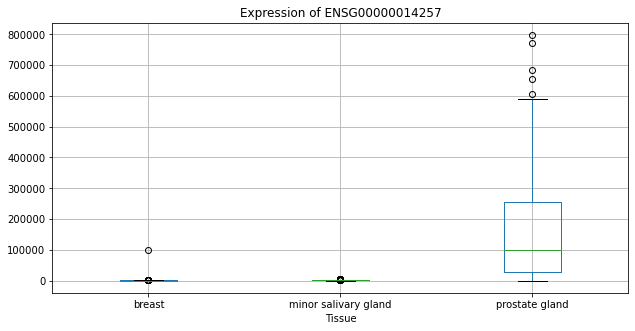

In [4]:
samples_expressions = pd.merge(samples, expressions)
samples_expressions.boxplot('expression', 'Tissue', rot=0, figsize=(10,5))
plt.title('Expression of %s' % gene)
x = plt.suptitle('')